In [1]:
import pandas as pd
from upsetplot import generate_data, UpSet, from_contents
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ctl_c = pd.read_csv('./ctl_c/ctl_c_genes.csv')
ctl_b = pd.read_csv('./ctl_b/ctl_b_genes.csv')
b_c = pd.read_csv('./b_c/b_c_genes.csv') 

In [6]:
# Extract 'Gene Symbol' From each list
genes_ctl_c = ctl_c['Gene Symbol']
genes_ctl_b = ctl_b['Gene Symbol']
genes_b_c = b_c['Gene Symbol']


print('Genes in b_c:')
print("\n".join(genes_b_c))

# print(f'Genes in ctl_s1: {" ".join(genes_ctl_s1)}\n')
# print(f'Genes in s1_s2: {" ".join(genes_s1_s2)}\n')
# print(f'Genes in s2_s3: {" ".join(genes_s2_s3)}\n')
# print(f'Genes in s3_s4: {" ".join(genes_s3_s4)}\n')

Genes in b_c:
AKR7L
ASB6
MAFF
POMGNT1
PTPN2
BRPF1
ESF1
MGAT1
SLC10A3
ELN
MFSD13A
TMEM40
ZNF281
MAX
MDK
AK3
VWC2
KRI1
POLD4
TIGD6
OPTN
FAM210B
NKPD1
HIST3H3
ST3GAL1
VPS13D
FFAR1
IL2RA
ISPD
TMEM56
JPH2
TMEM43
SIGLEC6
ZC3H15
GPSM2
MPRIP
PPIA
TCF23
PGBD5
ACTR5
ARHGEF5
BROX
C4orf19
C8orf58
CHDH
DDX39B
DNAJC8
FADS6
FAM9B
FBXO27
GK5
HEBP2
HIST1H1B
INMT
INTS3
KDELC2
KRT32
METTL27
MOGAT1
NFX1
PIEZO1
PIGX
PLEC
POM121L7P
QPRT
RAB15
SELENON
SLC35E2B
SNX22
TDRD1
TEP1
TFPI
TOMM70
ULK1
ZBTB7A
ZNF74
ZNF841
ZSCAN29
ARIH2OS
PKM
CSTF2
ADCY2
FBXL18
HIST2H2AB
MAGT1
RBM5
RPS6KA1
SPECC1
ARMCX6
BMS1
C20orf196
FLG2
GLRX
HACD4
MAF
MAGEB10
MYH11
PFN1
PIM3
PPP1R9B
RHBDL2
RPTN
TCF3
UROS
ZNF485
MAP4K2
IDS
MAPK10
MLX
PIK3R2
TMED10
WDR17
C16orf45
PRMT3
RNF170
RPH3AL
SETD1B
SPATA6
TMEM54
UBE2S
XPO5
ATP5E
GRASP
SEC22C
ACPP
MSRB1
TMEM250
NMNAT2
MEAF6
RAB5B
ALOX15
COL13A1
KLHL7
RICTOR
CTRC
WNT10B
DBT
MRPS23
ZFP36
AP1S1
CCDC142
CTXN1
LUC7L
MID1IP1
SYAP1
HSPA14
RBL1
ZNF655
AGAP9
CHAC1
PABPN1
PHLDA3
ACTBL2
ATXN2
CIPC
CYP2W1

In [ ]:
ctl_c = pd.ExcelFile('./genecards_comparisons/ctl_c_gc.xlsx')
ctl_b = pd.ExcelFile('./genecards_comparisons/ctl_b.xlsx')
b_c = pd.ExcelFile('./genecards_comparisons/b_c.xlsx')

In [ ]:
ctl_c_pathways = pd.read_excel(ctl_c, 'Pathways', skiprows=18)
ctl_b_pathways = pd.read_excel(ctl_b, 'Pathways', skiprows=18)
b_c_pathways = pd.read_excel(b_c, 'Pathways', skiprows=18)


ctl_c_diseases = pd.read_excel(ctl_c, 'Diseases', skiprows=18)
ctl_b_diseases = pd.read_excel(ctl_b, 'Diseases', skiprows=18)
b_c_diseases = pd.read_excel(b_c, 'Diseases', skiprows=18)

In [ ]:
# print(f'ctl_s1_pathways columns: {ctl_c_pathways.columns}\n')
# print(f's1_s2_pathways columns: {ctl_b_pathways.columns}\n')
# print(f's2_s3_pathways columns: {b_c_pathways.columns}\n')

# print(f'ctl_s1_diseases columns: {ctl_c_diseases.columns}\n')
# print(f's1_s2_diseases columns: {ctl_b_diseases.columns}\n')
# print(f's2_s3_diseases columns: {b_c_diseases.columns}\n')

In [ ]:
ctl_c_pathways_set = ctl_c_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_c'})
ctl_b_pathways_set = ctl_b_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'ctl_b'})
b_c_pathways_set = b_c_pathways[['SuperPath Name', 'Score']].rename(columns={'Score': 'b_c'})

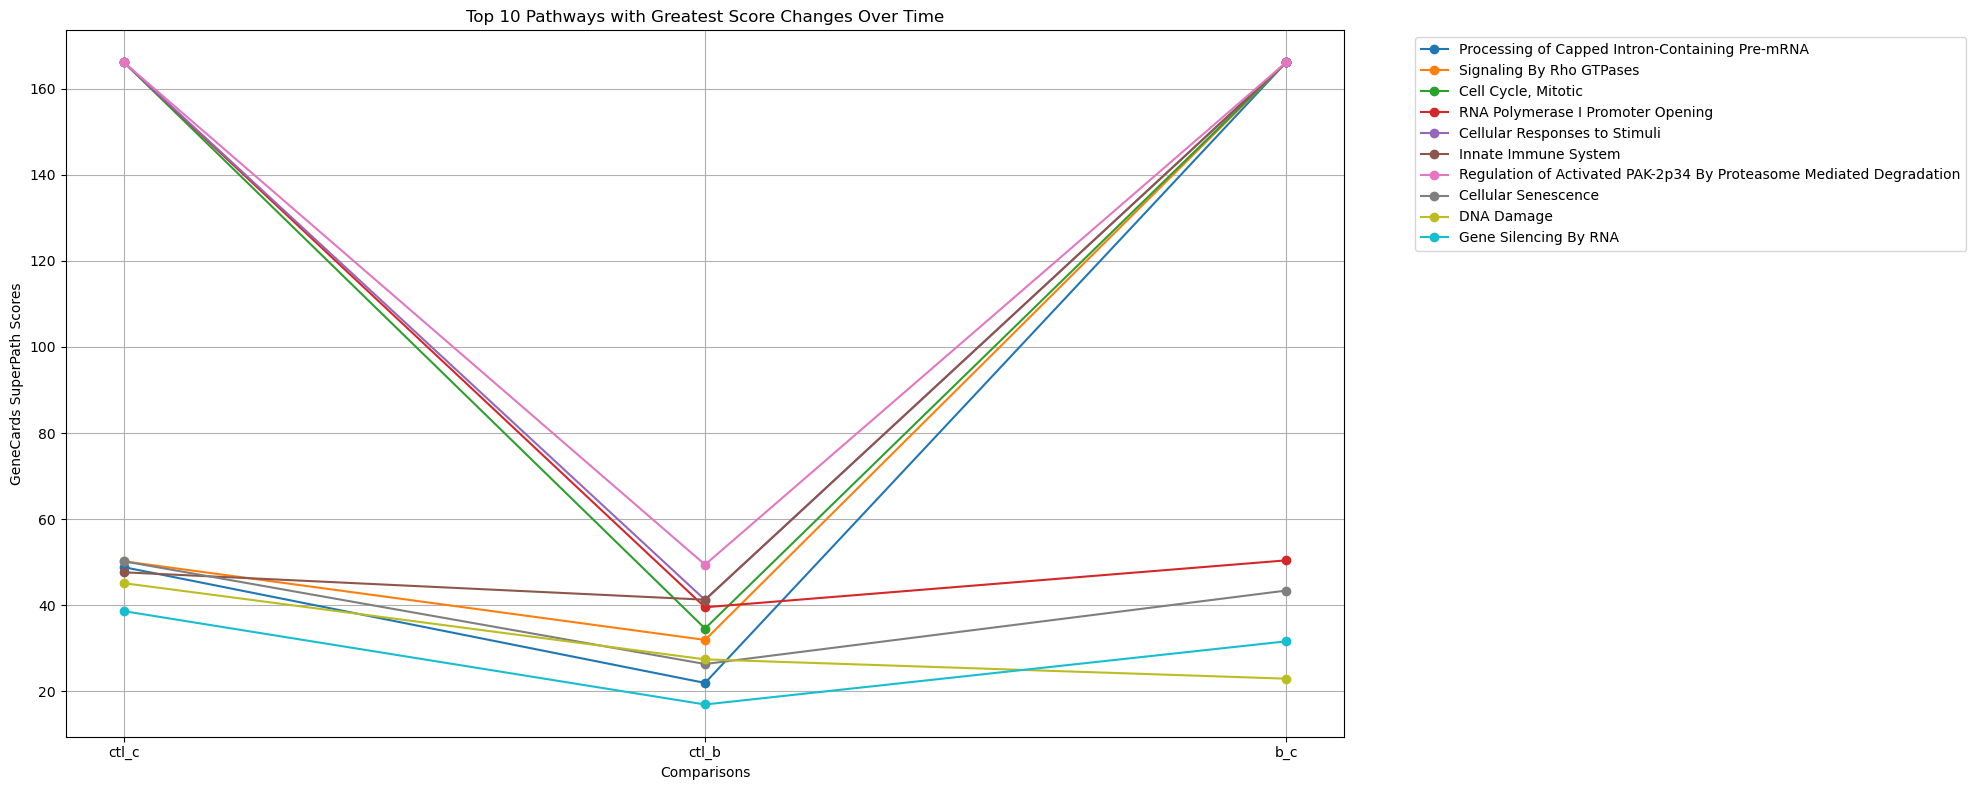

Top pathways with greatest score changes between comparisons:
                                        SuperPath Name       ctl_c      ctl_b  \
220    Processing of Capped Intron-Containing Pre-mRNA   48.830075  21.942116   
268                           Signaling By Rho GTPases   50.192645  31.932851   
49                                 Cell Cycle, Mitotic  166.096405  34.583590   
231                  RNA Polymerase I Promoter Opening  166.096405  39.519462   
52                       Cellular Responses to Stimuli  166.096405  41.228923   
147                               Innate Immune System   47.642448  41.280611   
240  Regulation of Activated PAK-2p34 By Proteasome...  166.096405  49.415037   
53                                 Cellular Senescence   50.192645  26.335125   
70                                          DNA Damage   45.111257  27.419512   
119                              Gene Silencing By RNA   38.611848  16.934797   

            b_c  score_change  
220  166.09640

In [ ]:
#  Merge the data on 'SuperPath Name'
merged_df = ctl_c_pathways_set
merged_df = merged_df.merge(ctl_b_pathways_set, on='SuperPath Name', how='outer')
merged_df = merged_df.merge(b_c_pathways_set, on='SuperPath Name', how='outer')



# Calculate the score changes only for the numeric columns
numeric_cols = merged_df.columns.drop('SuperPath Name')
merged_df['score_change'] = merged_df[numeric_cols].max(axis=1) - merged_df[numeric_cols].min(axis=1)

# Sort by score changes
sorted_df = merged_df.sort_values(by='score_change', ascending=False)

# Select top pathways with the most significant changes
top_changes_df = sorted_df.head(10)

# Plot the scores of pathways that change the most over time
plt.figure(figsize=(20, 8))
stages = numeric_cols

for index, row in top_changes_df.iterrows():
    plt.plot(stages, row[numeric_cols], marker='o', label=row['SuperPath Name'])

plt.xlabel('Comparisons')
plt.ylabel('GeneCards SuperPath Scores')
plt.title('Top 10 Pathways with Greatest Score Changes Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the top pathways with their score changes
print(f'Top pathways with greatest score changes between comparisons:\n{top_changes_df}')

Top Pathways Involved Across All Groups (Highest Average Scores):
                                        SuperPath Name  average_score
49                                 Cell Cycle, Mitotic     124.572304
260                                Signal Transduction     124.572304
143                                 Infectious Disease     124.572304
52                       Cellular Responses to Stimuli     124.572304
118                    Gene Expression (Transcription)     124.572304
174                             Metabolism of Proteins     124.572304
240  Regulation of Activated PAK-2p34 By Proteasome...     124.572304
231                  RNA Polymerase I Promoter Opening      95.651962
268                           Signaling By Rho GTPases      95.596364
220    Processing of Capped Intron-Containing Pre-mRNA      95.255721

Top Pathways for ctl_c:
                                      SuperPath Name       ctl_c
0                                Signal Transduction  166.096405
1        

/var/folders/c_/rs13jmts3nbf9xfm917mh9p80000gn/T/ipykernel_88841/2903748346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pathways_in_all_groups['average_score'] = pathways_in_all_groups[numeric_cols_pathways].mean(axis=1)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be s

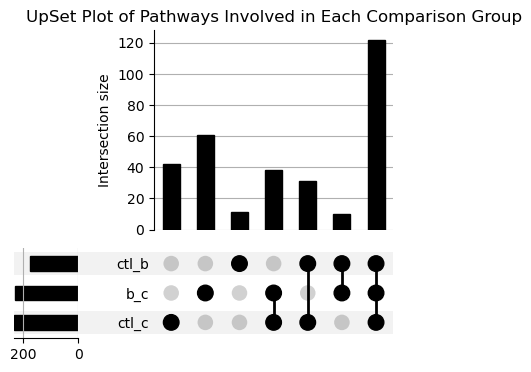

In [ ]:
pathways_in_all_groups = merged_df.dropna()

# Calculate the average score for each pathway across all groups (numeric columns only)
numeric_cols_pathways = pathways_in_all_groups.columns.drop('SuperPath Name')
pathways_in_all_groups['average_score'] = pathways_in_all_groups[numeric_cols_pathways].mean(axis=1)

# Sort pathways by the average score
sorted_pathways = pathways_in_all_groups.sort_values(by='average_score', ascending=False)

# Select top pathways with the highest average score
top_pathways = sorted_pathways.head(10)

# Print the top pathways with their average scores
print("Top Pathways Involved Across All Groups (Highest Average Scores):")
print(top_pathways[['SuperPath Name', 'average_score']])

# Determine top pathways for each comparison
top_ctl_c_pathways = ctl_c_pathways_set.sort_values(by='ctl_c', ascending=False).head(10)
top_ctl_b_pathways = ctl_b_pathways_set.sort_values(by='ctl_b', ascending=False).head(10)
top_b_c_pathways = b_c_pathways_set.sort_values(by='b_c', ascending=False).head(10)

# Print top pathways for each comparison group
print("\nTop Pathways for ctl_c:")
print(top_ctl_c_pathways[['SuperPath Name', 'ctl_c']])

print("\nTop Pathways for ctl_b:")
print(top_ctl_b_pathways[['SuperPath Name', 'ctl_b']])

print("\nTop Pathways for b_c:")
print(top_b_c_pathways[['SuperPath Name', 'b_c']])

# Create the UpSet plot for pathways
data_pathways = {
    'ctl_c': set(ctl_c_pathways['SuperPath Name']),
    'ctl_b': set(ctl_b_pathways['SuperPath Name']),
    'b_c': set(b_c_pathways['SuperPath Name'])
}

upset_data_pathways = from_contents(data_pathways)
upset_pathways = UpSet(upset_data_pathways, subset_size='count')
upset_pathways.plot()

# Show the plot
plt.title('UpSet Plot of Pathways Involved in Each Comparison Group')
plt.show()

Top Diseases Involved Across All Groups (Highest Average Scores):
                          Name  average_score
1468             Breast Cancer     227.723333
2467         Colorectal Cancer     200.443333
8705           Prostate Cancer     156.290000
9075      Retinitis Pigmentosa     153.920000
6197               Lung Cancer     143.603333
4299            Gastric Cancer     136.513333
6624              Microcephaly     134.580000
7908            Ovarian Cancer     133.696667
4721  Hepatocellular Carcinoma     126.216667
902   Autism Spectrum Disorder     110.856667

Top Diseases for ctl_c:
                       Name   ctl_c
0             Breast Cancer  237.53
1         Colorectal Cancer  212.68
2           Prostate Cancer  169.62
3               Lung Cancer  161.85
4      Retinitis Pigmentosa  160.97
5            Ovarian Cancer  149.32
6            Gastric Cancer  141.46
7  Hepatocellular Carcinoma  140.06
8              Microcephaly  137.93
9    Nervous System Disease  119.76

Top Di

/var/folders/c_/rs13jmts3nbf9xfm917mh9p80000gn/T/ipykernel_88841/2871220495.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diseases_in_all_groups['average_score'] = diseases_in_all_groups[numeric_cols].mean(axis=1)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a 

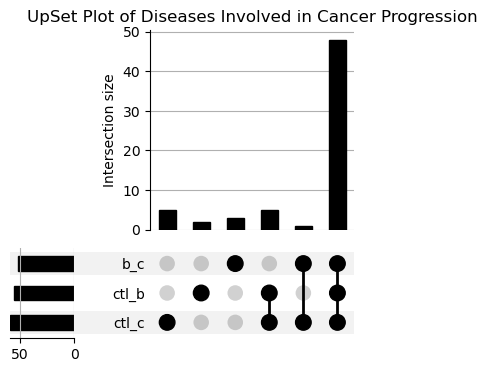

In [ ]:
ctl_c_diseases_set = ctl_c_diseases[['Name', 'Score']].rename(columns={'Score': 'ctl_c'})
ctl_b_diseases_set = ctl_b_diseases[['Name', 'Score']].rename(columns={'Score': 'ctl_b'})
b_c_diseases_set = b_c_diseases[['Name', 'Score']].rename(columns={'Score': 'b_c'})

# Merge the data on 'Name'
merged_df = ctl_c_diseases_set
merged_df = merged_df.merge(ctl_b_diseases_set, on='Name', how='outer')
merged_df = merged_df.merge(b_c_diseases_set, on='Name', how='outer')

# Filter diseases that are present in all groups
diseases_in_all_groups = merged_df.dropna()

# Calculate the average score for each disease across all groups (numeric columns only)
numeric_cols = diseases_in_all_groups.columns.drop('Name')
diseases_in_all_groups['average_score'] = diseases_in_all_groups[numeric_cols].mean(axis=1)

# Sort diseases by the average score
sorted_diseases = diseases_in_all_groups.sort_values(by='average_score', ascending=False)

# Select top diseases with the highest average score
top_diseases = sorted_diseases.head(10)

# Print the top diseases with their average scores
print("Top Diseases Involved Across All Groups (Highest Average Scores):")
print(top_diseases[['Name', 'average_score']])

# Determine top diseases for each comparison
top_ctl_c_diseases = ctl_c_diseases_set.sort_values(by='ctl_c', ascending=False).head(10)
top_ctl_b_diseases = ctl_b_diseases_set.sort_values(by='ctl_b', ascending=False).head(10)
top_b_c_diseases = b_c_diseases_set.sort_values(by='b_c', ascending=False).head(10)

# Print top diseases for each comparison group
print("\nTop Diseases for ctl_c:")
print(top_ctl_c_diseases[['Name', 'ctl_c']])

print("\nTop Diseases for ctl_b:")
print(top_ctl_b_diseases[['Name', 'ctl_b']])

print("\nTop Diseases for b_c:")
print(top_b_c_diseases[['Name', 'b_c']])

# Create the UpSet plot for diseases
data_diseases = {
    # filter for Score >= 53.74
    'ctl_c': set(ctl_c_diseases['Name'].loc[ctl_c_diseases['Score'] >= 53.74]),
    # filter for Score >= 48.95
    'ctl_b': set(ctl_b_diseases['Name'].loc[ctl_b_diseases['Score'] >= 48.95]),
    # filter for Score >= 58.38
    'b_c': set(b_c_diseases['Name'].loc[b_c_diseases['Score'] >= 58.38]),
}

# Ensure the order of columns
ordered_data_diseases = {key: data_diseases[key] for key in ['ctl_c', 'ctl_b', 'b_c']}

# Create UpSet data from the ordered dictionary
upset_data_diseases = from_contents(ordered_data_diseases)

# Reverse the order of the sets before creating the UpSet plot
upset_diseases = UpSet(upset_data_diseases, subset_size='count', sort_by='degree')

# Manually reverse the order of the sets
set_order = ['s3_s4', 's2_s3', 's1_s2', 'ctl_s1']
upset_diseases = UpSet(upset_data_diseases, subset_size='count', sort_categories_by=None)
upset_diseases.plot()

# Show the plot
plt.title('UpSet Plot of Diseases Involved in Cancer Progression')
plt.show()